# Simulated Annealing

We will be trying to find and visualize the path between Equestrian Statue of Edward VII and Bahen Center of Technology around Toronto University campus using simulated annealing

In [ ]:
%%capture

##############################################################################
# IGNORE if you are running on a local machine and have all the dependencies #
##############################################################################

# installing dependencies --- to be able to run on google colab
# it would take 2-3 minutes
!apt-get install libspatialindex-c4v5;
!pip3 install Rtree;
!pip3 install osmnx;

# you HAVE to upload a number of files and folders used in the code
# problem.py - utils.py - data files inside directory named data
# upload them in the home directory --- don't go into any folder, just press upload button
# and choose these files and folders
# so tthe directory should be 
#|- data/       |- graph.html
#|              |- route.html 
#|- sample_data/ 
#|- problem.py
#|- utils.py

In [1]:
import osmnx as ox
import networkx as nx
from IPython.display import IFrame, HTML
from collections import deque
import matplotlib.pyplot as plt
import numpy as np
import sys, random
from problem import *
from utils import *

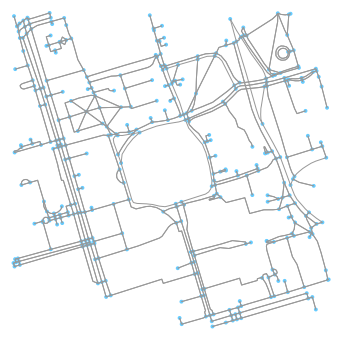

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
fig, ax = ox.plot_graph(G)

In [3]:
# we need to save the graph 
filepath = 'data/graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

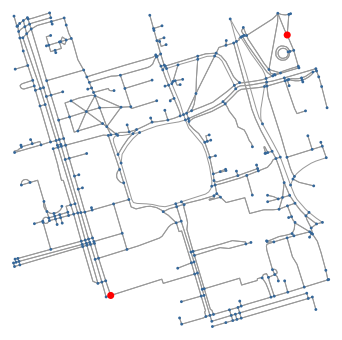

In [4]:
# marking both the source and destination node

nc = ['r' if node == 389677909 or node == 55808290 else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

## The Algorithm

__SIMULATED-ANNEALING__(graph, schedule) __returns__ a solution state  
&emsp;_current_ &larr; _source-node_  
&emsp;__for__ _t_ &larr; __to__ $\inf$  
&emsp;&emsp; _T_ &larr; _schedule(t)_  
&emsp;&emsp; __if__ _current_ __is__ _destination_ __then__ __return__ _current_.PATH  
&emsp;&emsp; __if__ _T_ = 0 __then__ __return__ _current_.PATH
&emsp;&emsp; _neighbors_ &larr; _current_.SUCCESSORS
&emsp;&emsp; _next_ &larr; randomly choose one node from _neighbors_
&emsp;&emsp;

In [5]:
%%capture
source(Node)

In [6]:
source(exp_schedule)

In [39]:
schedule = exp_schedule(limit=1000)

In [40]:
toGoal, _ = Astar_distance(G, 55808290, 389677909)

In [41]:
origin = Node(graph = G, node = G[55808290], osmid = 55808290, distance = 0, parent = None)
destination = Node(graph = G, node = G[389677909], osmid = 389677909)

In [42]:
states = []
explored = set()
current = origin
for t in range(sys.maxsize):
    if current == destination:
        route, cost = current.path()
        break
    T = schedule(t)
    if T == 0:
        route, cost = current.path()
        break
    neighbors = current.expand()
    if not neighbors:
        route, cost  = current.path()
        break
    next_choice = random.choice(neighbors)
    delta_e = toGoal[next_choice.osmid] - toGoal[current.osmid]
    if delta_e < 0 or probability(np.exp(delta_e)/T): # getting closer to the goal
        current = next_choice

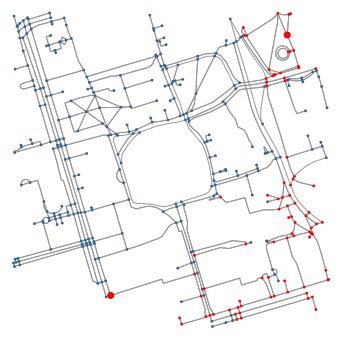

In [44]:
nc = ['r' if node in route else '#336699' for node in G.nodes()]
ns = [50 if node == 389677909 or node == 55808290 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

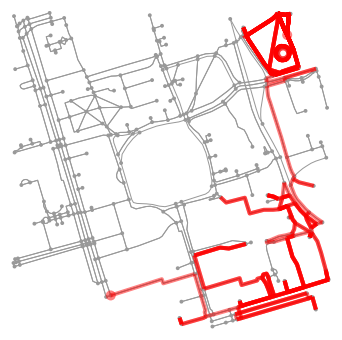

In [45]:
fig, ax = ox.plot_graph_route(G, route)

In [24]:
cost

21037.33399999998